## Project Overview

This is a project part of the Google Advanced Data Analytics. I did my first attempt before comparing with the final exemplar results.

The data will be used to predict whether a customer of the bank will churn. If a customer churns, it means they left the bank and took their business elsewhere. If you can predict which customers are likely to churn, you can take measures to retain them before they do.



In [4]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data modeling
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay

In [5]:
#load dataset 
df_original = pd.read_csv(r"C:\Users\LENOVO\OneDrive\Desktop\Data analytics\Machine_Learning_Python\Supervised learning\2. Classification\2. Naive Bayes classification\Supervised_learning_Naive_Bayes\Churn_Modelling.csv")
df_original.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
#See general information 
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### 1. Feature Egineering 

**Feature selection**

1. Consider what data is available to you
2. Decide on what kind of model you need
3. Decide on a target variable
4. Assemble a collection of features that you think might help predict on your chosen target

Returning to the bank data, notice that the first column is called `RowNumber`, and it just enumerates the rows. We should drop this feature, because row number shouldn't have any correlation with whether or not a customer churned.

The same is true for `CustomerID`, which appears to be a number assigned to the customer for administrative purposes, and `Surname`, which is the customer's last name. Since these cannot be expected to have any influence over the target variable, we can remove them from the modeling dataset.

Finally, for ethical reasons, we should remove the `Gender` column. The reason for doing this is that we don't want our model-making predictions (and therefore, offering promotions/financial incentives) based on a person's gender.

In [7]:
#Drop unnessary columns 
churn_df = df_original.drop(['RowNumber', 'CustomerId', 'Surname', 'Gender'], axis= 1)
churn_df.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0
2,502,France,42,8,159660.80,3,1,0,113931.57,1
3,699,France,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0


**Feature extraction**

Let's create a Loyalty feature that represents the percentage of each customer's life that they were customers. We can do this by dividing Tenure by Age:

Loyalty= Tenure / Age
 
The intuition here is that people who have been customers for a greater proportion of their lives might be less likely to churn.

In [8]:
#Create a Loyalty column 
churn_df['Loyalty'] = churn_df['Tenure']/ churn_df['Age']
churn_df

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Loyalty
0,619,France,42,2,0.00,1,1,1,101348.88,1,0.047619
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0,0.024390
2,502,France,42,8,159660.80,3,1,0,113931.57,1,0.190476
3,699,France,39,1,0.00,2,0,0,93826.63,0,0.025641
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0,0.046512
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,39,5,0.00,2,1,0,96270.64,0,0.128205
9996,516,France,35,10,57369.61,1,1,1,101699.77,0,0.285714
9997,709,France,36,7,0.00,1,0,1,42085.58,1,0.194444
9998,772,Germany,42,3,75075.31,2,1,0,92888.52,1,0.071429


**Feature transformation**

The next step is to transform our features to get them ready for modeling. Different models have different requirements for how the data should be prepared and also different assumptions about their distributions, independence, and so on. You learned about some of these already for linear and logistic regression, and you will continue learning about them as you encounter new modeling techniques.


In [9]:
#See unique values for Geography 
churn_df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [10]:
#Encode categorical feature
churn_df = pd.get_dummies(churn_df, drop_first=True)
churn_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Loyalty,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0.047619,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,0.024390,False,True
2,502,42,8,159660.80,3,1,0,113931.57,1,0.190476,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,0.025641,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,0.046512,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0.128205,False,False
9996,516,35,10,57369.61,1,1,1,101699.77,0,0.285714,False,False
9997,709,36,7,0.00,1,0,1,42085.58,1,0.194444,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,0.071429,True,False


In [11]:
#Transform to numeric data 
churn_df[['Geography_Germany', 'Geography_Spain']] = churn_df[['Geography_Germany', 'Geography_Spain']].astype('int64')

In [12]:
churn_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Loyalty,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0.047619,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.024390,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0.190476,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0.025641,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.046512,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0.128205,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,0.285714,0,0
9997,709,36,7,0.00,1,0,1,42085.58,1,0.194444,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0.071429,1,0


### 2. Naive Bayes modeling 

Remember, our target variable is called `Exited`. This is a Boolean value that indicates whether or not a customer left the bank (0 = did not leave, 1 = did leave). For each customer, our model will predict whether they should have a 0 or a 1 in the `Exited` column.

**Important model design:**

This is a classification task, because we are trying to predict on a binary class. Naive Bayes often works well for this kind of task. However, recall that there are several different implementations of the Naive Bayes algorithm in scikit-learn, and each assumes that all of your predictor variables are of a single type (e.g., Gaussian for continuous variables, Bernoulli for binary variables, etc.). 

Our data has all different types of predictor variables! As a data professional, one of the first things you'll learn on the job is that real-world data is never perfect. Sometimes the data breaks the assumptions of your model. In practice, you'll have to do the best you can with what you have. 

In this case, if we wanted to build the best possible Naive Bayes model, we'd treat each variable according to their different types and distributions, and then combine each conditional probability to get the final prediction for each observation. That's advanced data science, and beyond the scope of this course. 

For this lesson, we're going to use the `GaussianNB` classifier. This implementation assumes that all of your variables are continuous _and_ that they have a Gaussian (i.e., normal) distribution. Our data doesn't perfectly adhere to these assumptions, but a Gaussian model may still yield usable results, even with imperfect data.


In [13]:
#Import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics as metrics

from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#### 1. Data prep

In [14]:
#See previous dataset 
churn_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Loyalty,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0.047619,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.024390,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0.190476,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0.025641,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.046512,0,1


In [15]:
#First we need to check the class balance of the Exited column 
churn_df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

The class is split roughly 80/20. In other words, ~20% of the people in this dataset churned. This is an unbalanced dataset, but it's not extreme. 

Also, remember that the Naive Bayes formula depends on class priors _(P(c))_ to make predictions. Because of this, performing class balancing (e.g., upsampling or downsampling) would change those terms in a way that would no longer reflect the real-world distribution of the data.

For these reasons, we'll proceed without altering the class balance of our target variable.

**Drop dependent variables**

Remember that Naive Bayes models operate best when there's conditional independence between the predictor variables. When we prepared our data, we engineered a feature called Loyalty by dividing Tenure by Age. Because this new feature is just the quotient of two existing variables, it's no longer conditionally independent. Therefore, we'll drop Tenure and Age to help adhere to the assumptions of our model.

In [16]:
#Drop Age and Tenure columns 
churn_df = churn_df.drop(['Tenure', 'Age'], axis= 1)
churn_df.head()

,CreditScore,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Loyalty,Geography_Germany,Geography_Spain
0,619,0.00,1,1,1,101348.88,1,0.047619,0,0
1,608,83807.86,1,0,1,112542.58,0,0.024390,0,1
2,502,159660.80,3,1,0,113931.57,1,0.190476,0,0
3,699,0.00,2,0,0,93826.63,0,0.025641,0,0
4,850,125510.82,1,1,1,79084.10,0,0.046512,0,1


**Split the data**

We've prepared our data and we're ready to model. There's one last step before we can begin. We must split the data into features and target variable, and into training data and test data. We do this using the train_test_split() function. We'll put 25% of the data into our test set, and use the remaining 75% to train the model.

Notice below that we include the argument stratify=y. If our master data has a class split of 80/20, stratifying ensures that this proportion is maintained in both the training and test data. =y tells the function that it should use the class ratio found in the y variable (our target).

The less data you have overall, and the greater your class imbalance, the more important it is to stratify when you split the data. If we didn’t stratify, then the function would split the data randomly, and we could get an unlucky split that doesn’t get any of the minority class in the test data, which means we wouldn’t be able to effectively evaluate our model. Worst of all, we might not even realize what went wrong without doing some detective work.

Lastly, we set a random seed so we and others can reproduce our work.


In [17]:
#Define the Y target variable 
y = churn_df['Exited']

#Define the X variable 
X = churn_df.copy()
X = X.drop ('Exited', axis=1)

In [18]:
#Split data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify= y, random_state= 42)

In [19]:
X_train.shape, y_train.shape

((7500, 9), (7500,))

#### 2. Construct the model 

In [20]:
# Fit the model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Get the predictions on test data
y_preds = gnb.predict(X_test)

In [21]:
#Get the evaluation metrics 
print('Accuracy:', '%.3f' % accuracy_score(y_test, y_preds))
print('Precision:', '%.3f' % precision_score(y_test, y_preds))
print('Recall:', '%.3f' % recall_score(y_test, y_preds))
print('F1 Score:', '%.3f' % f1_score(y_test, y_preds))

Accuracy: 0.796
Precision: 0.000
Recall: 0.000
F1 Score: 0.000


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
np.unique(y_preds)

array([0], dtype=int64)

Hmm… this isn’t very good. Our precision, recall, and F1 scores are all zero. What’s going on? Well, let’s consider our precision formula:
𝑝𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛=true positives / false positives + true positives
 
There are two ways for the model to have a precision of zero. The first is if the numerator is zero, which would mean that our model didn’t predict any true positives.

The second is if the denominator is also zero, which would mean that our model didn’t predict any positives at all. Dividing by zero results in an undefined value, but scikit-learn will return a value of zero in this case. Depending on your modeling environment, you may get a warning that tells you there’s a denominator of zero.

We don’t have a warning, so let’s check which situation is occurring here. If we call np.unique() on the model's predictions and it doesn't return an array containing [0, 1], we'll know it's not predicticting any churned customers.

**Scale the data**

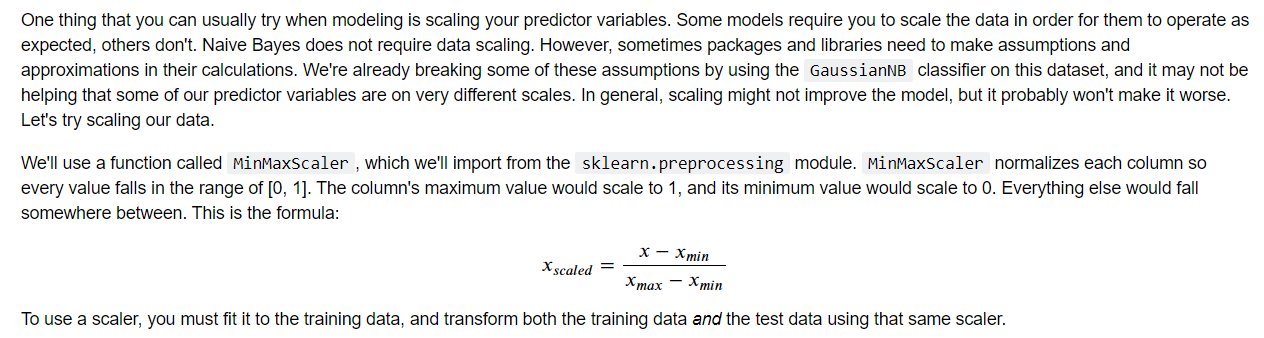


In [23]:
#Import the scaler function 
from sklearn.preprocessing import MinMaxScaler

#Instantiate the scaler 
scaler = MinMaxScaler()

#Fit the scaler to the training data
scaler.fit(X_train)

#Scale the training data 
X_train = scaler.transform(X_train)

#Scale the test data 
X_test = scaler.transform(X_test)

X_test


array([[0.57      , 0.44398489, 0.33333333, ..., 0.26470588, 0.        ,
        1.        ],
       [0.814     , 0.65415054, 0.        , ..., 0.18      , 0.        ,
        1.        ],
       [0.622     , 0.67812632, 0.33333333, ..., 0.25714286, 1.        ,
        0.        ],
       ...,
       [0.412     , 0.27603723, 0.        , ..., 0.28235294, 0.        ,
        0.        ],
       [0.584     , 0.        , 0.33333333, ..., 0.22909091, 0.        ,
        0.        ],
       [0.698     , 0.55609339, 0.33333333, ..., 0.1       , 1.        ,
        0.        ]])

In [24]:
#View X_test in a dataframe 
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8
0,0.570,0.443985,0.333333,1.0,0.0,0.078616,0.264706,0.0,1.0
1,0.814,0.654151,0.000000,0.0,1.0,0.991743,0.180000,0.0,1.0
2,0.622,0.678126,0.333333,0.0,1.0,0.568281,0.257143,1.0,0.0
3,0.832,0.416214,0.333333,0.0,1.0,0.330942,0.242308,0.0,0.0
4,0.360,0.000000,0.333333,0.0,1.0,0.738046,0.175610,0.0,1.0
...,...,...,...,...,...,...,...,...,...
2495,0.844,0.685662,0.333333,1.0,0.0,0.397050,0.484615,1.0,0.0
2496,0.746,0.000000,0.333333,1.0,1.0,0.472065,0.284211,0.0,1.0
2497,0.412,0.276037,0.000000,1.0,0.0,0.994090,0.282353,0.0,0.0
2498,0.584,0.000000,0.333333,1.0,1.0,0.507569,0.229091,0.0,0.0


**Fit the model with scaled data**

In [25]:
#Fit the model 
gnb_scaled = GaussianNB()
gnb_scaled.fit (X_train, y_train)

#Get the predictions on test data 
scaled_preds = gnb_scaled.predict(X_test)

In [26]:
#Get the evaluation metrics from the scaled training data 
print('Accuracy:', '%.3f' % accuracy_score(y_test, scaled_preds))
print('Precision:', '%.3f' % precision_score(y_test,scaled_preds))
print('Recall:', '%.3f' % recall_score(y_test, scaled_preds))
print('F1 Score:', '%.3f' % f1_score(y_test, scaled_preds))

Accuracy: 0.806
Precision: 0.544
Recall: 0.303
F1 Score: 0.389


**3. Evaluation**

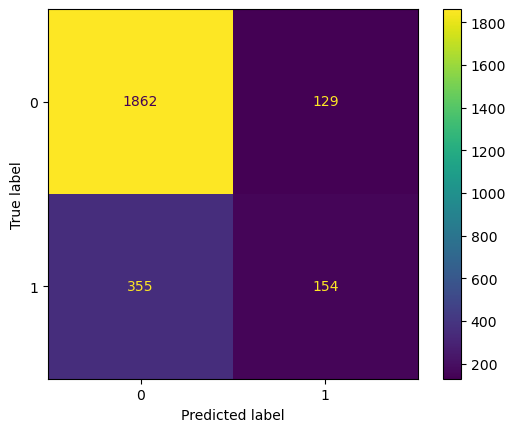

In [27]:
#Confusion matrix 
cm = metrics.confusion_matrix(y_test, scaled_preds, labels = gnb_scaled.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = gnb_scaled.classes_)
disp.plot()

All of our model metrics can be derived from the confusion matrix, and each metric tells its own part of the story. What stands out most in the confusion matrix is that the model misses a lot of customers who will churn. In other words, there are a lot of false negatives—355, to be exact. This is why our recall score is only 0.303.

Would we use this model? It depends. For one thing, we'd certainly want to develop other models to see if they perform better.